## CW generation.


In [1]:
! pip install pmcx
! pip install numpy pmcx jdata bjdata matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for bjdata: filename=bjdata-0.4.1-cp311-cp311-linux_x86_64.whl size=22196 sha256=7ff2176cb2bbd38dcffdc0551033feb98a2e842a719e2a06b5c7804dc93fc26b
  Stored in directory: /root/.cache/pip/wheels/e4/d5/4a/8d5ccb70c0eb1f07a10da8548e50b7fc0cbdfd014f5eaa45c3
Successfully built bjdata


In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys
import os
import pmcx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
import math
import io

Mounted at /content/drive


In [3]:
# Path to your folder containing the .py script
folder_path = '/content/drive/MyDrive/MCX_data'

# Add to sys.path so you can import the script
if folder_path not in sys.path:
    sys.path.append(folder_path)
from FD_msNIRS import mcx_simulation as ms
from FD_msNIRS import extract_freq as ef

In [4]:
!ls '/content/drive/MyDrive/MCX_data'

2_L_30_mu_as_df.csv	       EC.xlsx	     __pycache__
2_L_30_mu_s_primes_df.csv.csv  FD_msNIRS.py


In [5]:
pmcx.gpuinfo()

[{'name': 'NVIDIA A100-SXM4-40GB',
  'id': 1,
  'devcount': 1,
  'major': 8,
  'minor': 0,
  'globalmem': 42474471424,
  'constmem': 65536,
  'sharedmem': 49152,
  'regcount': 65536,
  'clock': 1410000,
  'sm': 108,
  'core': 6912,
  'autoblock': 64,
  'autothread': 442368,
  'maxgate': 0}]

### concentration -> Ua and Us

### Ua

In [6]:
HbO2_mean = 60  # microMolar
Hb_mean = 25    # microMolar
CCO_mean = 8.5    # microMolar
concentrations_true = np.array([HbO2_mean, Hb_mean, CCO_mean])
C_true = concentrations_true / 1e6

In [44]:
#lambdas = [784, 800, 818, 835, 851, 868, 881, 894]
lambdas = list(range(784, 901))

In [45]:
extinction_coeffs = pd.read_excel(folder_path + "/EC.xlsx")
extinction_coeffs_filtered = extinction_coeffs[extinction_coeffs['Lambda'].isin(lambdas)]

In [46]:
E3 = extinction_coeffs_filtered[['HbO2', 'Hb','CCO']].values
E3 = E3 * math.log(10)
E3.shape

(117, 3)

In [47]:
mu_a = np.dot(C_true, E3.T)

In [48]:
mu_a

array([0.20474467, 0.20474596, 0.20491804, 0.20510529, 0.20531114,
       0.20562821, 0.20596442, 0.20628977, 0.20667292, 0.20724223,
       0.20786765, 0.20850002, 0.20916312, 0.2099052 , 0.21064826,
       0.21137336, 0.21210724, 0.21271942, 0.21339503, 0.21410984,
       0.21482217, 0.21556619, 0.21637109, 0.21717706, 0.21795823,
       0.21879225, 0.21963354, 0.22043254, 0.22125521, 0.22205149,
       0.22285032, 0.22369016, 0.2245316 , 0.22536736, 0.22618976,
       0.22701919, 0.22789691, 0.22873158, 0.2295342 , 0.23028641,
       0.2310831 , 0.23181959, 0.23261594, 0.2333706 , 0.2341272 ,
       0.23482777, 0.23555741, 0.23628049, 0.23700754, 0.23776702,
       0.23853781, 0.2393086 , 0.24002086, 0.24078969, 0.24154602,
       0.24231539, 0.24306541, 0.24381476, 0.24453988, 0.2452122 ,
       0.24591912, 0.24664242, 0.24734668, 0.24805642, 0.24877737,
       0.24953023, 0.2502225 , 0.25090614, 0.25158676, 0.25221037,
       0.25284489, 0.25348078, 0.25399878, 0.25457477, 0.25512

### Us

In [49]:
a = 22
b = 1.2
mu_s_prime = np.array([a * (wavelength / 500) ** (-b) for wavelength in lambdas])

In [50]:
mu_s_prime

array([12.82352465, 12.8039243 , 12.78437882, 12.76488796, 12.74545151,
       12.72606925, 12.70674096, 12.68746642, 12.66824541, 12.64907773,
       12.62996314, 12.61090144, 12.59189242, 12.57293587, 12.55403157,
       12.53517931, 12.5163789 , 12.49763011, 12.47893274, 12.4602866 ,
       12.44169147, 12.42314716, 12.40465345, 12.38621016, 12.36781707,
       12.349474  , 12.33118074, 12.3129371 , 12.29474288, 12.2765979 ,
       12.25850194, 12.24045483, 12.22245637, 12.20450636, 12.18660463,
       12.16875098, 12.15094523, 12.13318718, 12.11547665, 12.09781346,
       12.08019743, 12.06262836, 12.04510608, 12.02763041, 12.01020117,
       11.99281818, 11.97548125, 11.95819022, 11.9409449 , 11.92374513,
       11.90659072, 11.8894815 , 11.8724173 , 11.85539795, 11.83842327,
       11.8214931 , 11.80460726, 11.78776559, 11.77096792, 11.75421409,
       11.73750391, 11.72083724, 11.70421391, 11.68763374, 11.67109659,
       11.65460228, 11.63815066, 11.62174157, 11.60537484, 11.58

### MCX Simulation using packgae

In [51]:
g=0.85
distance = [2, 2.5, 3.0 ,3.5]
distance_mm = [d * 10 for d in distance]  # mm
distance_data = {d: [] for d in distance_mm}
t_end = 5e-07
n_photon = 5e7

for sim_idx, (ua_row, us_p_row) in enumerate(zip(mu_a, mu_s_prime)):
    us = us_p_row / (1 - g)
    ua_mm = ua_row / 10
    us_mm = us / 10
    print('ua_mm = ', ua_mm)
    print('us_mm = ', us_mm)
    print(f"\n--- Simulation {sim_idx + 1} ---")

    # -------- Simulation for Multi-Distances --------------
    TPSF_list, time_unit = ms(ua_mm, us_mm, g=0.85, n=1.370, distance=distance_mm, tend=t_end, devf=1, nphoton=n_photon)
    [[x[0] * n_photon * t_end ] for x in TPSF_list] # weight/mm2
    for i, d in enumerate(distance_mm):
        distance_data[d].append(TPSF_list[i][0])

ua_mm =  0.02047446691247822
us_mm =  8.549016430272166

--- Simulation 1 ---
nphoton: 5e+07
tstart: 0
tstep: 5e-07
tend: 5e-07
maxdetphoton: 5e+07
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
ua_mm =  0.020474595857243427
us_mm =  8.535949535474568

--- Simulation 2 ---
nphoton: 5e+07
tstart: 0
tstep: 5e-07
tend: 5e-07
maxdetphoton: 5e+07
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
ua_mm =  0.02049180422693592
us_mm =  8.522919210027016

--- Simulation 3 ---
nphoton: 5e+07
tstart: 0
tstep: 5e-07
tend: 5e-07
maxdetphoton: 5e+07
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
ua_mm =  0.020510528848912146
us_mm =  8.509925305254743

--- Simulation 4 ---
nphoton: 5e+07
tstart: 0
tstep: 5e-07
tend: 5e-07
maxdetphoton: 5e+07
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
ua_mm =  0.020531113959643514
us_mm =  8.496967673275314

--- Simulation 5 ---
nphoton: 5e+07
tstart: 0
tstep: 5e-07
tend: 5e-07
maxdetphoton: 5e+

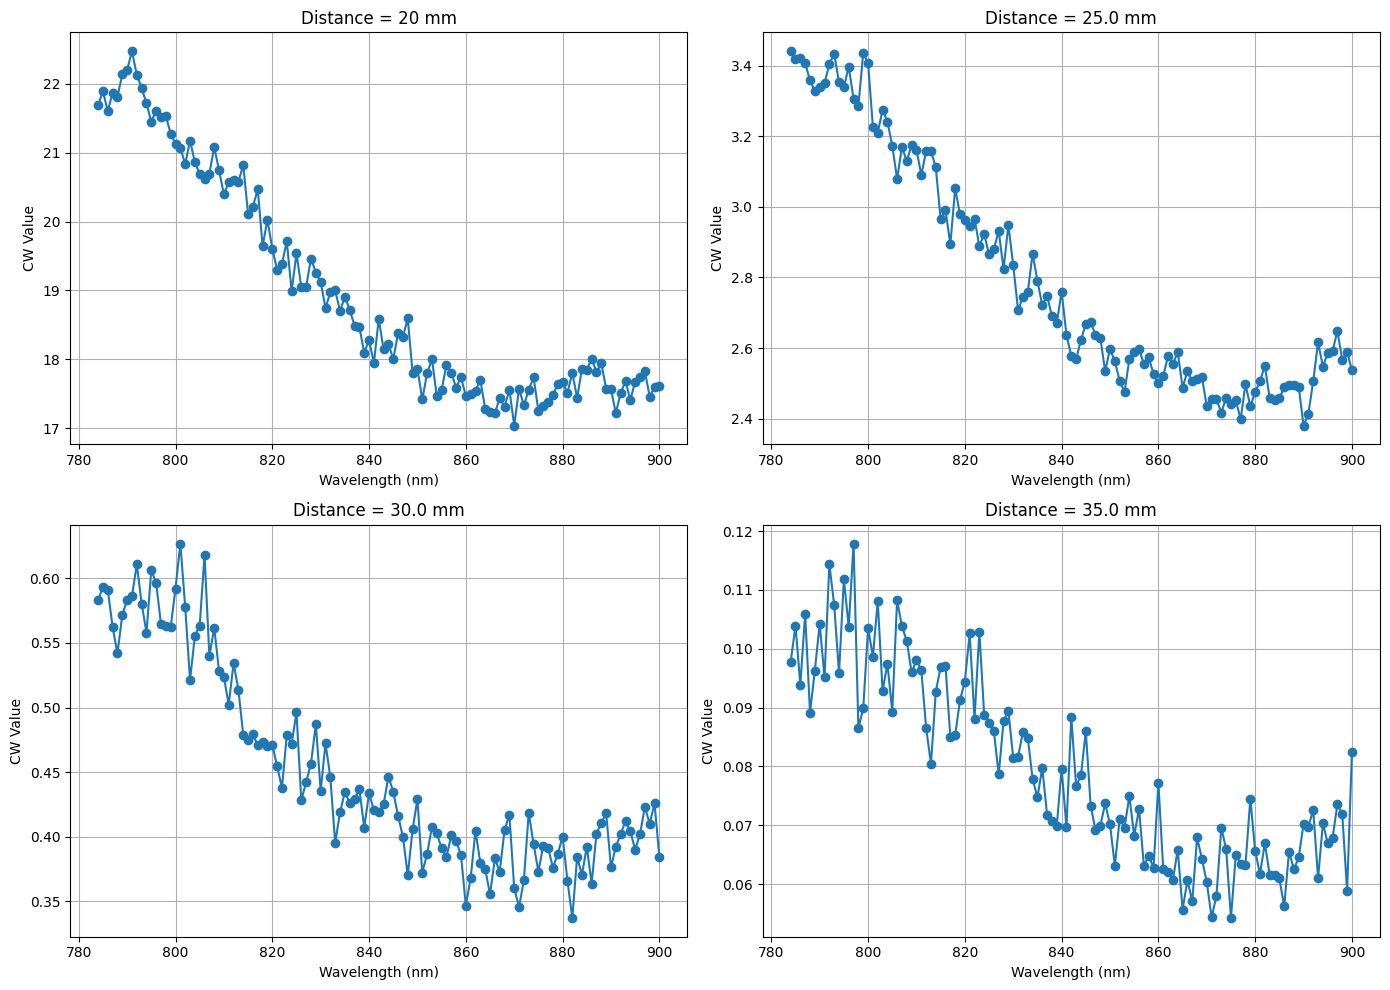

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for idx, (distance, values) in enumerate(distance_data.items()):
    axs[idx].plot(lambdas, values, marker='o')
    axs[idx].set_title(f'Distance = {distance} mm')
    axs[idx].set_xlabel('Wavelength (nm)')
    axs[idx].set_ylabel('CW Value')
    axs[idx].grid(True)

plt.tight_layout()
plt.show()

In [53]:
mu_s_prime

array([12.82352465, 12.8039243 , 12.78437882, 12.76488796, 12.74545151,
       12.72606925, 12.70674096, 12.68746642, 12.66824541, 12.64907773,
       12.62996314, 12.61090144, 12.59189242, 12.57293587, 12.55403157,
       12.53517931, 12.5163789 , 12.49763011, 12.47893274, 12.4602866 ,
       12.44169147, 12.42314716, 12.40465345, 12.38621016, 12.36781707,
       12.349474  , 12.33118074, 12.3129371 , 12.29474288, 12.2765979 ,
       12.25850194, 12.24045483, 12.22245637, 12.20450636, 12.18660463,
       12.16875098, 12.15094523, 12.13318718, 12.11547665, 12.09781346,
       12.08019743, 12.06262836, 12.04510608, 12.02763041, 12.01020117,
       11.99281818, 11.97548125, 11.95819022, 11.9409449 , 11.92374513,
       11.90659072, 11.8894815 , 11.8724173 , 11.85539795, 11.83842327,
       11.8214931 , 11.80460726, 11.78776559, 11.77096792, 11.75421409,
       11.73750391, 11.72083724, 11.70421391, 11.68763374, 11.67109659,
       11.65460228, 11.63815066, 11.62174157, 11.60537484, 11.58

In [54]:
mu_a

array([0.20474467, 0.20474596, 0.20491804, 0.20510529, 0.20531114,
       0.20562821, 0.20596442, 0.20628977, 0.20667292, 0.20724223,
       0.20786765, 0.20850002, 0.20916312, 0.2099052 , 0.21064826,
       0.21137336, 0.21210724, 0.21271942, 0.21339503, 0.21410984,
       0.21482217, 0.21556619, 0.21637109, 0.21717706, 0.21795823,
       0.21879225, 0.21963354, 0.22043254, 0.22125521, 0.22205149,
       0.22285032, 0.22369016, 0.2245316 , 0.22536736, 0.22618976,
       0.22701919, 0.22789691, 0.22873158, 0.2295342 , 0.23028641,
       0.2310831 , 0.23181959, 0.23261594, 0.2333706 , 0.2341272 ,
       0.23482777, 0.23555741, 0.23628049, 0.23700754, 0.23776702,
       0.23853781, 0.2393086 , 0.24002086, 0.24078969, 0.24154602,
       0.24231539, 0.24306541, 0.24381476, 0.24453988, 0.2452122 ,
       0.24591912, 0.24664242, 0.24734668, 0.24805642, 0.24877737,
       0.24953023, 0.2502225 , 0.25090614, 0.25158676, 0.25221037,
       0.25284489, 0.25348078, 0.25399878, 0.25457477, 0.25512